# Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.
## Instructions
    1) Import the necessary libraries.
    2) Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
    3) First look at its main features (head, shape, info).
    4) Rename the columns so they follow the PE8 (snake case).
    5) Change effective to date column to datetime format.
    6) Check NaN values per column.
    7) Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
    8) For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
    9) Get categorical features.
    10) What should we do with the customer_id column?

## Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## First look at its main features (head, shape, info).

In [3]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

## Rename the columns so they follow the PE8 (snake case).


In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ","_")
customer_df.rename(columns = {"employmentstatus" : "employment_status"}, inplace = True)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Change effective to date column to datetime format.

In [5]:
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Check NaN values per column.

In [6]:
nans = customer_df[customer_df.isna().any(axis=1)]
display(nans.head())
print('----------------------------------')
display(customer_df.isna().any(axis=1))
print('----------------------------------')
nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
display(nulls.sort_values(by='Percentage Null Values', ascending = False))

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


----------------------------------


0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

----------------------------------


,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


In [7]:
customer_df = customer_df.set_index(customer_df['customer'])

customer_df = customer_df.drop(['customer'], axis=1)

customer_df.head()

y = customer_df['total_claim_amount']

customer_df = customer_df.drop(['total_claim_amount'], axis=1)

y.head()

customer
BU79786     384.811147
QZ44356    1131.464935
AI49188     566.472247
WW63253     529.881344
HB64268     138.130879
Name: total_claim_amount, dtype: float64

## Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [8]:
numcols = customer_df.select_dtypes(np.number)
numcols_list = list(numcols.columns)
discrete_cols = []
continuous_cols = []
for col in numcols_list:
    item_counts = customer_df[col].value_counts()
    print(col, ' : ', len(item_counts))
    if len(item_counts) > 100:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)
discrete_cols.append('effective_to_date')
print(discrete_cols)
print(continuous_cols)

customer_lifetime_value  :  8041
income  :  5694
monthly_premium_auto  :  202
months_since_last_claim  :  36
months_since_policy_inception  :  100
number_of_open_complaints  :  6
number_of_policies  :  9
['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'effective_to_date']
['customer_lifetime_value', 'income', 'monthly_premium_auto']


In [9]:
continuous = customer_df[continuous_cols]
display(continuous.head())
discrete = customer_df[discrete_cols]
display(discrete.head())
categorical = customer_df.select_dtypes(np.object)
display(categorical.head())

,customer_lifetime_value,income,monthly_premium_auto
customer,,,
BU79786,2763.519279,56274,69
QZ44356,6979.535903,0,94
AI49188,12887.431650,48767,108
WW63253,7645.861827,0,106
HB64268,2813.692575,43836,73


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
customer,,,,,
BU79786,32,5,0,1,2011-02-24
QZ44356,13,42,0,8,2011-01-31
AI49188,18,38,0,2,2011-02-19
WW63253,18,65,0,7,2011-01-20
HB64268,12,44,0,1,2011-02-03


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## For the categorical data, check if there is some kind of text in a variable so we would need to clean it.  Hint: Use the same method you used in step 7.  Depending on the implementation, decide what to do with the variables you get.

In [10]:
catcols_list = list(categorical.columns)
for col in catcols_list:
    item_counts = categorical[col].value_counts()
    print(col, ' : ', len(item_counts))
    if col != 'customer':
        print(item_counts)
        print()

state  :  5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response  :  2
No     7826
Yes    1308
Name: response, dtype: int64

coverage  :  3
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education  :  5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employment_status  :  5
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

gender  :  2
F    4658
M    4476
Name: gender, dtype: int64

location_code  :  3
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status  :  3
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type  :  3
Personal Auto     6788
Corporate Auto    19

## What should we do with the customer_id column?

##### We won't use client_id in the model, but we want to keep the relation of rows to rhe exact client, so we will turn client_id into the index.

# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------

# Lab | Cleaning categorical data
#### For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

### Instructions
    Import the necessary libraries if you are starting a new notebook.
    Load the continuous and discrete variables into continuous_df and discrete_df variables.
    Plot a correlation matrix, what can you see?
    Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
    What can you see in the plots?
    Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
    Have you found outliers? If you have, what should we do with them?
    Check nan values per column.

### Load the continuous and discrete variables into continuous_df and discrete_df variables

In [11]:
continuous_df = continuous
discrete_df = discrete

### Plot a correlation matrix, what can you see?

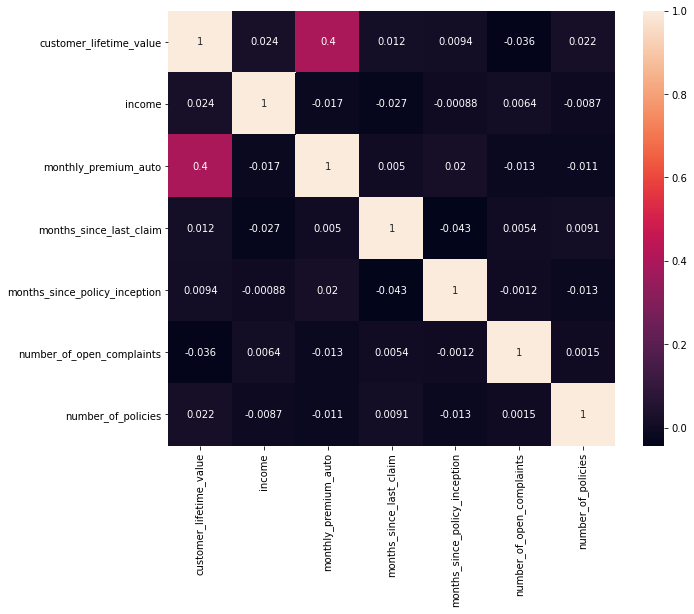

In [12]:
corr_matrix = numcols.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

From the correlation matrix we can spot the relatively high correlation between `total_claim_amount` and `monthly_premium_auto`.               
Maybe we could drop the `monthly_premium_auto` column?

### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

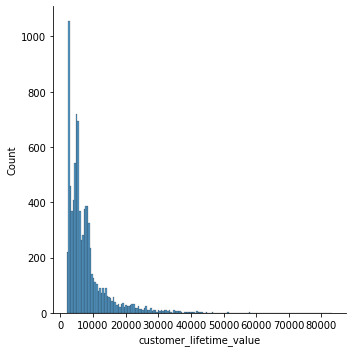

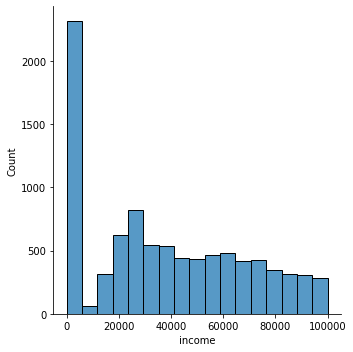

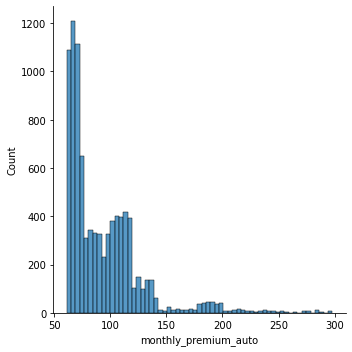

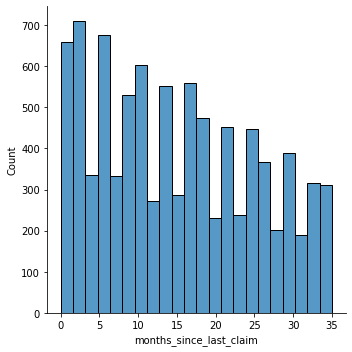

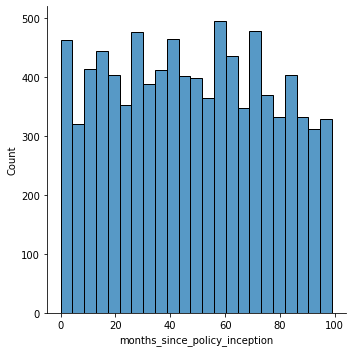

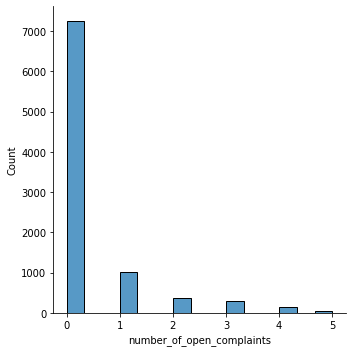

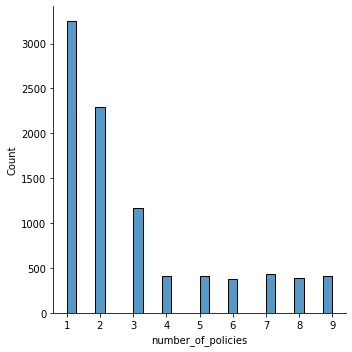

In [13]:
def num_plotter(df):
    numcolumns = df.select_dtypes(np.number)
    numcolumns_list = list(numcolumns.columns)
    for col in numcolumns_list:
        sns.displot(numcols, x = col)
        plt.show()

num_plotter(customer_df)

### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

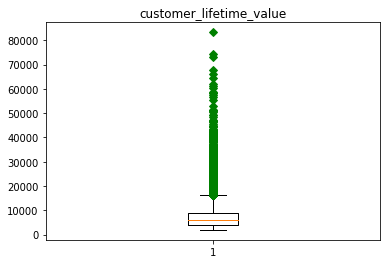

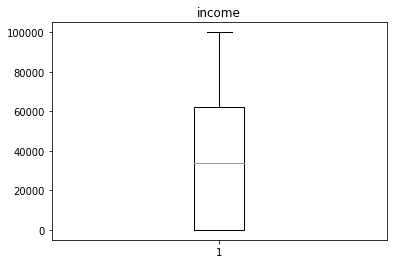

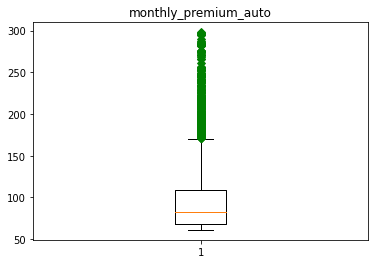

In [14]:
def get_boxplot(df):
    df_cols_list = list(df.columns)
    for col in df_cols_list:
        fig1, ax1 = plt.subplots()
        ax1.set_title(col)
        ax1.boxplot(df[col], 0, 'gD')
        plt.show()

get_boxplot(continuous_df)

In [15]:
def outliers(x):
    iqr = np.percentile(continuous_df[x],75) - np.percentile(continuous_df[x],25)
    upper_limit = np.percentile(continuous_df[x],75) + 1.5*iqr
    lower_limit = np.percentile(continuous_df[x],25) - 1.5*iqr
    print("The upper wisker is at: %4.2f" % upper_limit)
    print("The lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = continuous_df[continuous_df[x] > upper_limit].index.tolist()
    outliers_lower = continuous_df[lower_limit > continuous_df[x]].index.tolist()
    print("The number of points outside the upper wisker is: ",len(outliers_upper))
    print("The number of points outside the lower wisker is: ",len(outliers_lower))
    
list_continuous = list(continuous_df.columns)
for i in list_continuous:
    print("Column: ", i)
    outliers(i)
    print(
    )

Column:  customer_lifetime_value
The upper wisker is at: 16414.04
The lower wisker is at: -3457.62
The number of points outside the upper wisker is:  817
The number of points outside the lower wisker is:  0

Column:  income
The upper wisker is at: 155800.00
The lower wisker is at: -93480.00
The number of points outside the upper wisker is:  0
The number of points outside the lower wisker is:  0

Column:  monthly_premium_auto
The upper wisker is at: 170.50
The lower wisker is at: 6.50
The number of points outside the upper wisker is:  430
The number of points outside the lower wisker is:  0



### Have you found outliers? If you have, what should we do with them?

Yes, there are plenty of outliers, but my guess is that those values are not really outliers, but just a sign of a very non-normal distribution of values in the columns. Therefore, the bet thing to do is just to perform data transformations(most preferably `box-cox`) in order to make the distribution closer to normal, because if we deal with outliers in other way, it will affect the data, because the amount of "outliers" is big.

# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------

# Lab | Feature extraction
### For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions
    Open the categoricals variable we created before.
`categoricals = data.select_dtypes(np.object)
categoricals.head()`

    Plot all the categorical variables with the proper plot. What can you see?
    There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    Plot time variable. Can you extract something from it?

### 1) Open the categoricals variable we created before.

In [16]:
categorical.head()


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2) Plot all the categorical variables with the proper plot. What can you see?

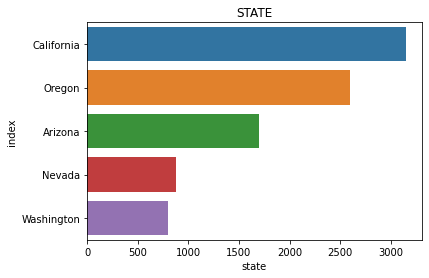

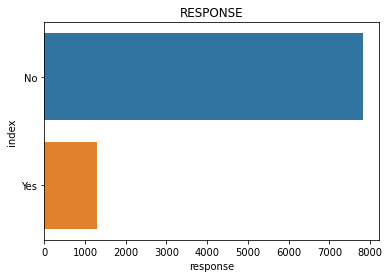

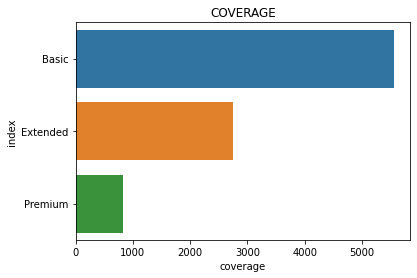

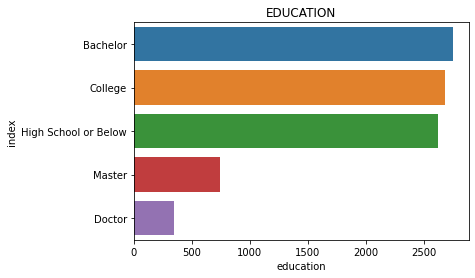

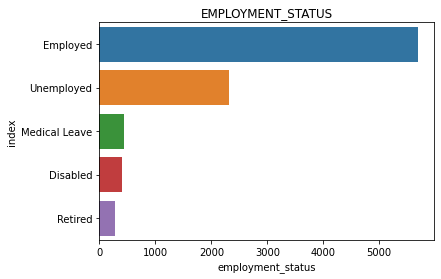

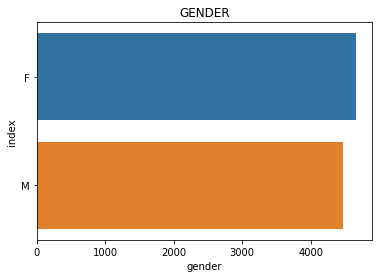

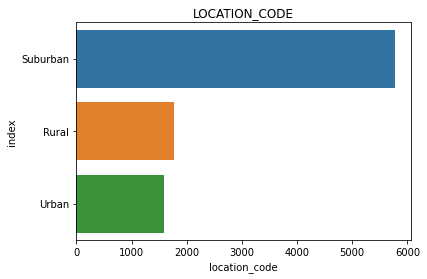

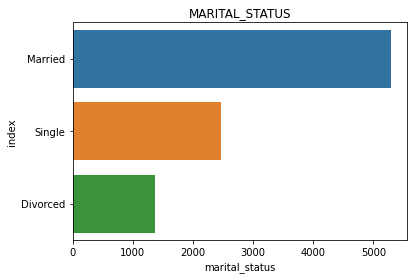

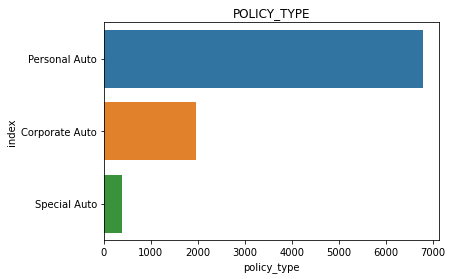

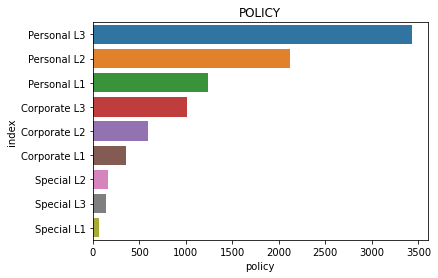

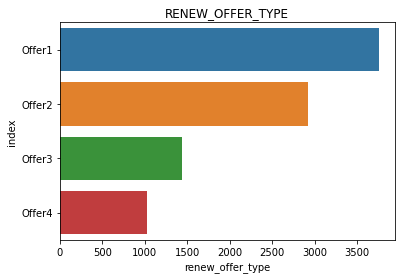

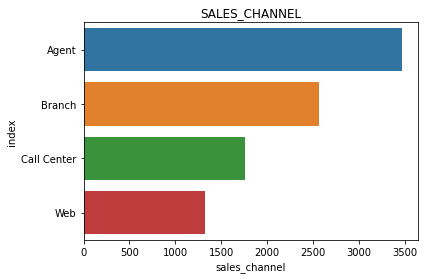

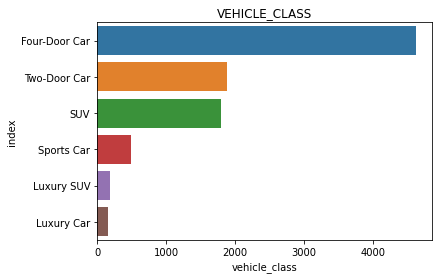

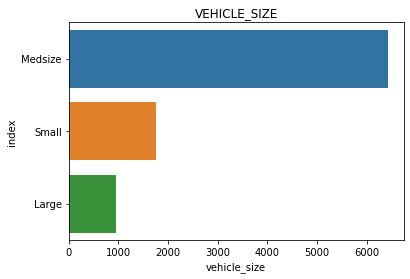

<Figure size 432x288 with 0 Axes>

In [17]:
def cat_plotter(df):
    cols_cat = list(df.select_dtypes(include=['object']).columns)
    for col in cols_cat:
        my_data = df[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
        plt.figure()
    
cat_plotter(categorical)

#### After plotting the categoricals, I can see, that there are a lot of columns, where one feature is way biider, than any other features, for example 
`coverage`,`employment_status`,`location_code`,`marital_status`, `vehicle_class`,`vehicle_size`.

### 3) There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [18]:
list_cat = list(categorical.columns)
for col in list_cat:
    display(categorical[col].value_counts())
    print()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

### 4) Plot time variable. Can you extract something from it?

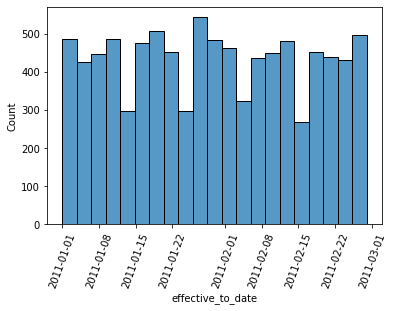

In [19]:
chart = sns.histplot(discrete_df['effective_to_date'])
plt.xticks(rotation=70)
plt.show()

I guess we cannot extract anything from this variable.

# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------

# Lab | Data cleaning and wrangling
### For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions
#### So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

    We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
    Create a copy of the dataframe for the data wrangling.
    Normalize the continuous variables. You can use any one method you want.
    Encode the categorical variables
    The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
    Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

### 1) We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with.

### Box-Cox transformation to reduce the amount of outliers


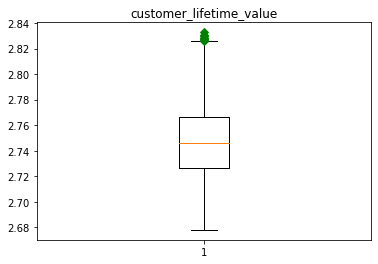

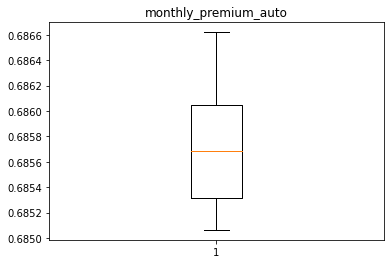

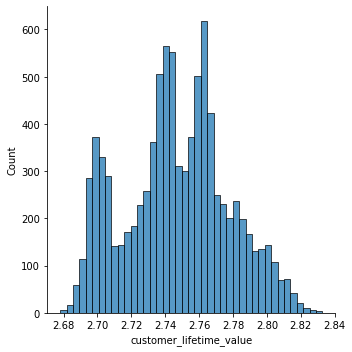

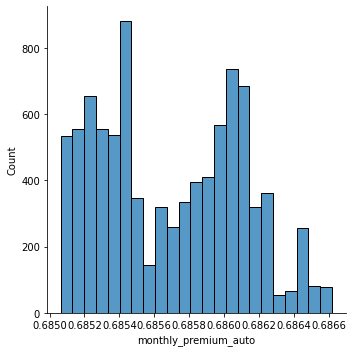

In [48]:
to_transform = continuous_df[['customer_lifetime_value', 'monthly_premium_auto']] 
# getting rid of 'imcome', because it has a 0 value, and Box-Cox transformation requires only positive values.
list_cols_cont = list(to_transform.columns)
transformed = to_transform.copy()
for col in list_cols_cont:
    fitted_data, lmbda = stats.boxcox(to_transform[col])
    transformed[col] = pd.DataFrame(fitted_data, index = transformed.index)

get_boxplot(transformed)
numcolumns_list = list(transformed.columns)
for col in numcolumns_list:
    sns.displot(transformed, x = col)
    plt.show()


#### As we see, the transformation worked good on the columns.

### 2) Create a copy of the dataframe for the data wrangling.

In [22]:
customers_copy = customer_df.copy()

### 3) Normalize the continuous variables. You can use any one method you want.

#### In the previous step, I actually already normalized the continuous data with the box-cox transformation. But
`income` 
##### remains my problem, as it contains '0' values, which are not permitted when using box-cox transformation. So maybe let's cheat a bit and just make the 0 value more positive? :)

In [23]:
def positive_income(col):
    list_x = []
    for x in col:
        if x == 0:
            x = 0.0001
            list_x.append(x)
        else:
            list_x.append(x)
    col = list_x
    return col
new_income = positive_income(customers_copy['income'])
continuous_df['income'] = pd.DataFrame(new_income, index = continuous_df.index)
continuous_df.head()

<ipython-input-23-a52dcd4e25a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['income'] = pd.DataFrame(new_income, index = continuous_df.index)


,customer_lifetime_value,income,monthly_premium_auto
customer,,,
BU79786,2763.519279,56274.0000,69
QZ44356,6979.535903,0.0001,94
AI49188,12887.431650,48767.0000,108
WW63253,7645.861827,0.0001,106
HB64268,2813.692575,43836.0000,73


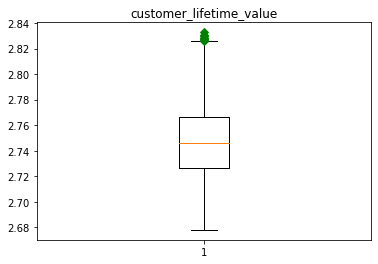

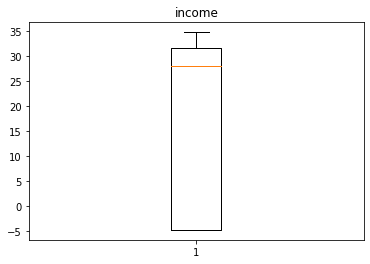

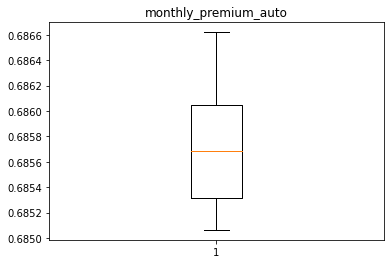

In [24]:
def get_box_cox(to_transform):
    list_cols_df = list(to_transform.columns)
    transformed = to_transform.copy()
    for col in list_cols_df:
        fitted_data, lmbda = stats.boxcox(to_transform[col])
        transformed[col] = pd.DataFrame(fitted_data, index = transformed.index)
    return transformed
transformed_cont = get_box_cox(continuous_df)
get_boxplot(transformed_cont)

### 4) Encode the categorical variables

In [ ]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size
# data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [26]:
ordinals = categorical[['coverage', 'employment_status', 'education', 'location_code', 'vehicle_size']]
nominals = categorical[['state', 'coverage', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(nominals)
encoded = encoder.transform(nominals).toarray()
pd.DataFrame(encoded)
"""cat = category_df_hot.columns
x = [j for i in cat for j in category_df_hot[i].unique()[1:]]

### ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(category_df_hot)
encoded = encoder.transform(category_df_hot).toarray()
category_df_ohe = pd.DataFrame(encoded , columns = x)
category_df_ohe.head()"""

In [27]:
nominals = pd.get_dummies(nominals)
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,coverage_Extended,coverage_Premium,gender_F,gender_M,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
QZ44356,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
AI49188,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
WW63253,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
HB64268,0,0,0,0,1,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
PK87824,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
TD14365,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [28]:
ordinals_copy = ordinals.copy()
ordinals_copy["coverage"] = ordinals["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [29]:
ordinals_copy["employment_status"] = ordinals["employment_status"].map({"Unemployed" : 0, "Retired" : 1, "Disabled" : 2, "Medical Leave" : 3, "Employed" : 4})

In [30]:
ordinals_copy["location_code"] = ordinals["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [31]:
ordinals_copy["vehicle_size"] = ordinals["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [32]:
ordinals_copy["education"] = ordinals["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
ordinals_copy

,coverage,employment_status,education,location_code,vehicle_size
customer,,,,,
BU79786,0,4,2,0,1
QZ44356,1,0,2,0,1
AI49188,2,4,2,0,1
WW63253,0,0,2,0,1
HB64268,0,4,2,1,1
...,...,...,...,...,...
LA72316,0,4,2,2,1
PK87824,1,4,1,0,1
TD14365,1,0,2,0,1


In [33]:
# we need to scale ordinals to have them in range [o,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformer = scaler.fit(ordinals_copy)
transformed = scaler.transform(ordinals_copy)
ordinals_transformed = pd.DataFrame(transformed, index = ordinals_copy.index)
ordinals_transformed_tidy = ordinals_transformed.rename(columns = {0: 'coverage', 1: 'employment_status', 2: 'education', 3: 'location_code', 4: 'vehicle_size'}, inplace = False)
ordinals_transformed_tidy

,coverage,employment_status,education,location_code,vehicle_size
customer,,,,,
BU79786,0.0,1.0,0.50,0.0,0.5
QZ44356,0.5,0.0,0.50,0.0,0.5
AI49188,1.0,1.0,0.50,0.0,0.5
WW63253,0.0,0.0,0.50,0.0,0.5
HB64268,0.0,1.0,0.50,0.5,0.5
...,...,...,...,...,...
LA72316,0.0,1.0,0.50,1.0,0.5
PK87824,0.5,1.0,0.25,0.0,0.5
TD14365,0.5,0.0,0.50,0.0,0.5


In [36]:
categoricals_full = ordinals_transformed_tidy.join(nominals)
#categoricals_concat = pd.concat([nominals, ordinals_transformed_tidy],axis=1,)
categoricals_full

,coverage,employment_status,education,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0.0,1.0,0.50,0.0,0.5,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
QZ44356,0.5,0.0,0.50,0.0,0.5,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
AI49188,1.0,1.0,0.50,0.0,0.5,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
WW63253,0.0,0.0,0.50,0.0,0.5,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
HB64268,0.0,1.0,0.50,0.5,0.5,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0.0,1.0,0.50,1.0,0.5,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
PK87824,0.5,1.0,0.25,0.0,0.5,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
TD14365,0.5,0.0,0.50,0.0,0.5,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### 5) The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [37]:
discrete_df['month'] = pd.DatetimeIndex(discrete_df['effective_to_date']).month

<ipython-input-37-8e79d6760281>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['month'] = pd.DatetimeIndex(discrete_df['effective_to_date']).month


In [38]:
discrete_df['week'] = pd.DatetimeIndex(discrete_df['effective_to_date']).week

<ipython-input-38-9e50c2855d32>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  discrete_df['week'] = pd.DatetimeIndex(discrete_df['effective_to_date']).week
<ipython-input-38-9e50c2855d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['week'] = pd.DatetimeIndex(discrete_df['effective_to_date']).week


In [39]:
discrete_df['day'] = pd.DatetimeIndex(discrete_df['effective_to_date']).day
discrete_df.head()

<ipython-input-39-5279ae7b5dfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['day'] = pd.DatetimeIndex(discrete_df['effective_to_date']).day


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date,month,week,day
customer,,,,,,,,
BU79786,32,5,0,1,2011-02-24,2,8,24
QZ44356,13,42,0,8,2011-01-31,1,5,31
AI49188,18,38,0,2,2011-02-19,2,7,19
WW63253,18,65,0,7,2011-01-20,1,3,20
HB64268,12,44,0,1,2011-02-03,2,5,3


In [40]:
discrete_df.drop(columns = 'effective_to_date', inplace = True)

/home/annast/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,week,day
customer,,,,,,,
BU79786,32,5,0,1,2,8,24
QZ44356,13,42,0,8,1,5,31
AI49188,18,38,0,2,2,7,19
WW63253,18,65,0,7,1,3,20
HB64268,12,44,0,1,2,5,3


In [43]:
numericals_full = transformed_cont.join(discrete_df)
numericals_full.head()
display(numericals_full.shape)

(9134, 10)

In [45]:
"""num_columns = numericals_full.columns
x = [j for i in cat for j in numericals_full[i].unique()[1:]]

### ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(category_df_hot)
encoded = encoder.transform(category_df_hot).toarray()
category_df_ohe = pd.DataFrame(encoded , columns = x)
category_df_ohe.head()"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformer = scaler.fit(numericals_full)
transformed = scaler.transform(numericals_full)
num_transformed = pd.DataFrame(transformed, index = numericals_full.index, columns = numericals_full.columns )
display(num_transformed.head())
display(num_transformed.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,week,day
customer,,,,,,,,,,
BU79786,0.167033,0.905928,0.182364,0.914286,0.050505,0.0,0.000,1.0,0.137255,0.766667
QZ44356,0.497030,0.000000,0.518717,0.371429,0.424242,0.0,0.875,0.0,0.078431,1.000000
AI49188,0.663983,0.883857,0.626985,0.514286,0.383838,0.0,0.125,1.0,0.117647,0.600000
WW63253,0.524149,0.000000,0.613651,0.514286,0.656566,0.0,0.750,0.0,0.039216,0.633333
HB64268,0.174501,0.867763,0.255460,0.342857,0.444444,0.0,0.000,1.0,0.078431,0.066667


(9134, 10)

### 6) Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [47]:
data_full = num_transformed.join(categoricals_full)
data_full

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,week,day,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0.167033,0.905928,0.182364,0.914286,0.050505,0.0,0.000,1.0,0.137255,0.766667,...,1,0,0,0,0,0,0,0,0,1
QZ44356,0.497030,0.000000,0.518717,0.371429,0.424242,0.0,0.875,0.0,0.078431,1.000000,...,1,0,0,0,1,0,0,0,0,0
AI49188,0.663983,0.883857,0.626985,0.514286,0.383838,0.0,0.125,1.0,0.117647,0.600000,...,1,0,0,0,0,0,0,0,0,1
WW63253,0.524149,0.000000,0.613651,0.514286,0.656566,0.0,0.750,0.0,0.039216,0.633333,...,0,0,1,0,0,0,0,1,0,0
HB64268,0.174501,0.867763,0.255460,0.342857,0.444444,0.0,0.000,1.0,0.078431,0.066667,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0.795739,0.945032,0.255460,0.514286,0.898990,0.0,0.125,1.0,0.098039,0.300000,...,0,0,0,1,1,0,0,0,0,0
PK87824,0.213478,0.767863,0.348327,0.400000,0.282828,0.0,0.000,1.0,0.098039,0.366667,...,0,1,0,0,1,0,0,0,0,0
TD14365,0.543125,0.000000,0.425360,0.257143,0.373737,0.6,0.125,1.0,0.078431,0.166667,...,0,1,0,0,1,0,0,0,0,0


In [49]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   float64
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   float64
 7   month                          9134 non-null   float64
 8   week                           9134 non-null   float64
 9   day                            9134 non-null   float64
 10  coverage                       9134 non-null   float64
 11  employment_status              9134 non-null   float64
 12  education                      9134 non-null

In [50]:
nulls = pd.DataFrame(data_full.isna().sum()/len(data_full))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
display(nulls.sort_values(by='Percentage Null Values', ascending = False))

,column_name,Percentage Null Values
0,customer_lifetime_value,0.0
40,renew_offer_type_Offer1,0.0
29,policy_type_Personal Auto,0.0
30,policy_type_Special Auto,0.0
31,policy_Corporate L1,0.0
32,policy_Corporate L2,0.0
33,policy_Corporate L3,0.0
34,policy_Personal L1,0.0
35,policy_Personal L2,0.0
36,policy_Personal L3,0.0
